In [4]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Handling
import numpy as np
import pandas as pd
import math

# Machine Learning (Regression Models)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns



In [5]:
# Configure visualisations
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8, 6

In [6]:
# Read CSV
df = pd.read_csv("wholesale_price.csv")

# Drop NaN row (last row)
df = df.dropna().reset_index(drop=True)

In [7]:
# Features = 2004–2010, Target = 2011–12
X = df.iloc[:, 1:-1]  # All years except last
y = df.iloc[:, -1]    # Last year column

# Scale features
X_scaled = scale(X)

In [8]:
# Split for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
full_X = df.iloc[:, 1:]  # Select all years except the crop column
X_latest = scale(full_X.iloc[:, :-1])  # Features: 2004–2022
y_latest = full_X.iloc[:, -1]          # Target: 2023

# Train model on available data
model.fit(X_latest, y_latest)

# Predict for 2024
pred_2024 = model.predict(X_latest)

# Add predictions to DataFrame
df["Predicted_2024"] = pred_2024

# Display predictions
print(df[["crop", "Predicted_2024"]])


                   crop  Predicted_2024
0                  Rice        113.3350
1                 Wheat        116.8722
2        Coarse Cereals        129.5037
3                Pulses        128.2705
4           Vegetables         121.2089
5                Fruits        115.6195
6                  Milk        124.0470
7   Eggs, Fish and Meat        130.6825
8              Oilseeds        107.9266
9            Sugarcane         110.2684
10               Fibers        131.9612
11      All Agriculture        124.1017


ValueError: x and y must have same first dimension, but have shapes (20,) and (9,)

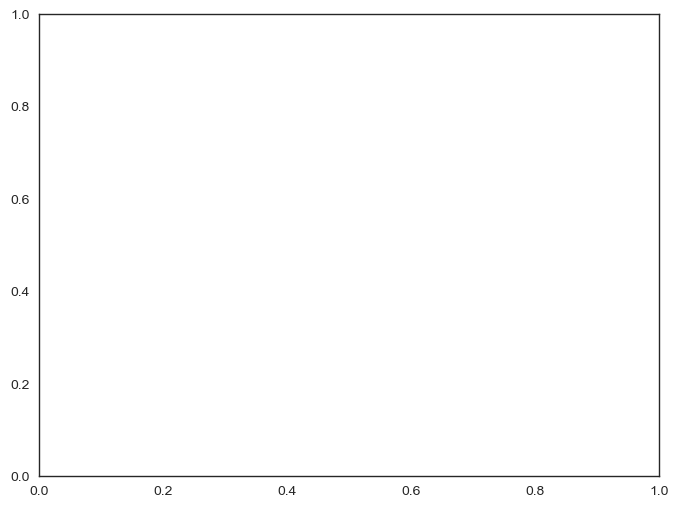

In [15]:
# Add prediction to DataFrame
df["Predicted_2012_13"] = pred_2024

# Choose the crop to plot (e.g., 'Rice')
selected_crop = "Rice"

# Filter the row
row = df[df["crop"] == selected_crop].iloc[0]

# Prepare data
years = list(range(2004, 2024))  # 2004–2011
prices = row[1:-1].values.astype(float)  # Actual prices till 2011–12

# Plot
plt.plot(years, prices, marker='o', label='Actual')
plt.plot(2012, row["Predicted_2012_13"], 'ro', label='Predicted 2012–13')
plt.title(f"{selected_crop} - Price Trend & Prediction")
plt.xlabel("Year")
plt.ylabel("Price Index")
plt.legend()
plt.grid(True)
plt.show()
